# Descision Tree

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.simplefilter('ignore')

In [92]:
df= pd.read_csv("Copy of heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


### EDA

In [93]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [95]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [96]:
df['oldpeak']=df['oldpeak'].fillna(df['oldpeak'].median())
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.5,downsloping,normal,4


In [97]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalch'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'num'}>]], dtype=object)

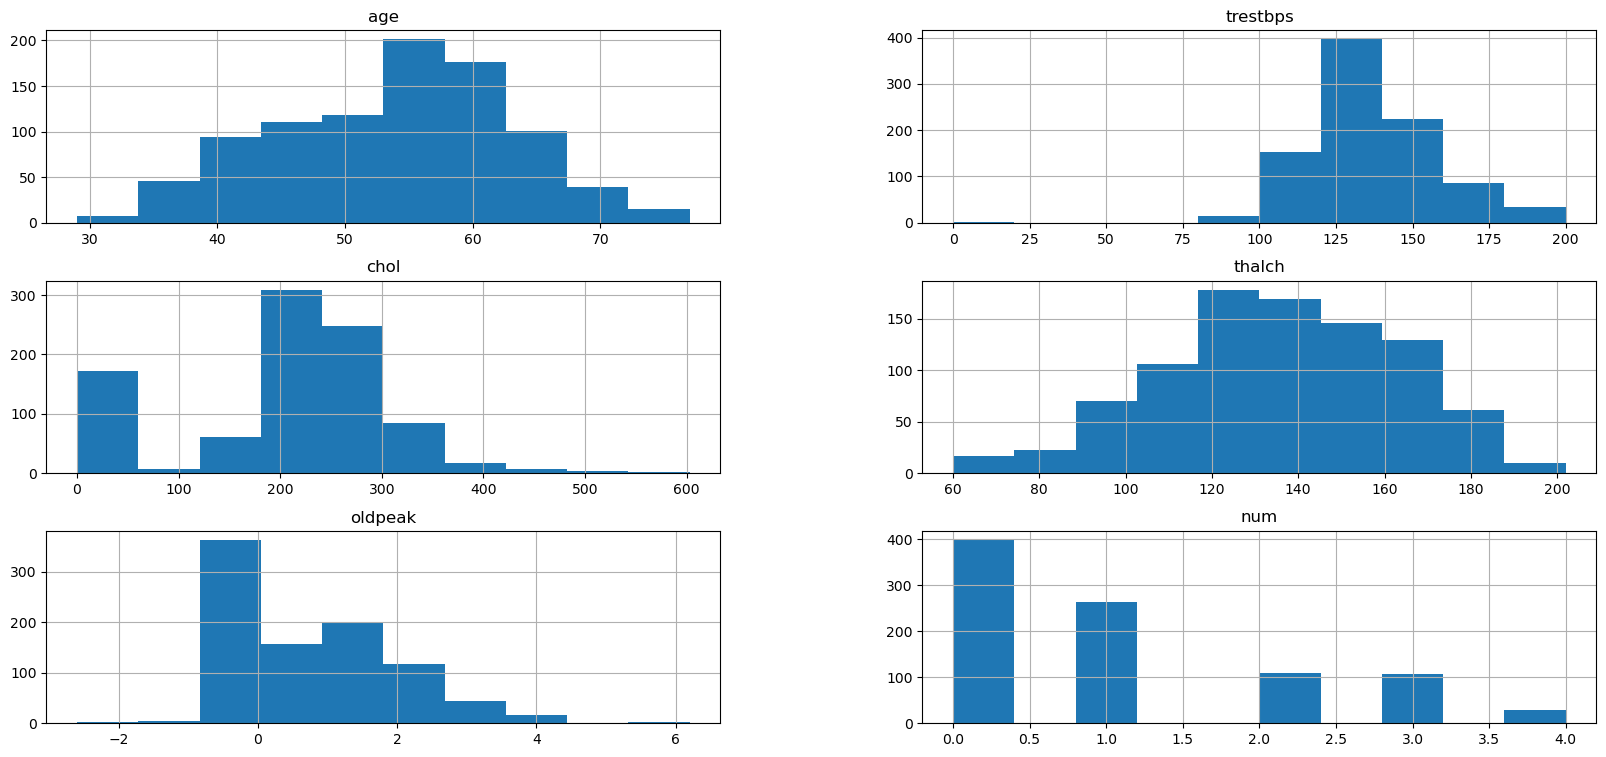

In [98]:
df.hist(figsize=(20,9))

<Axes: >

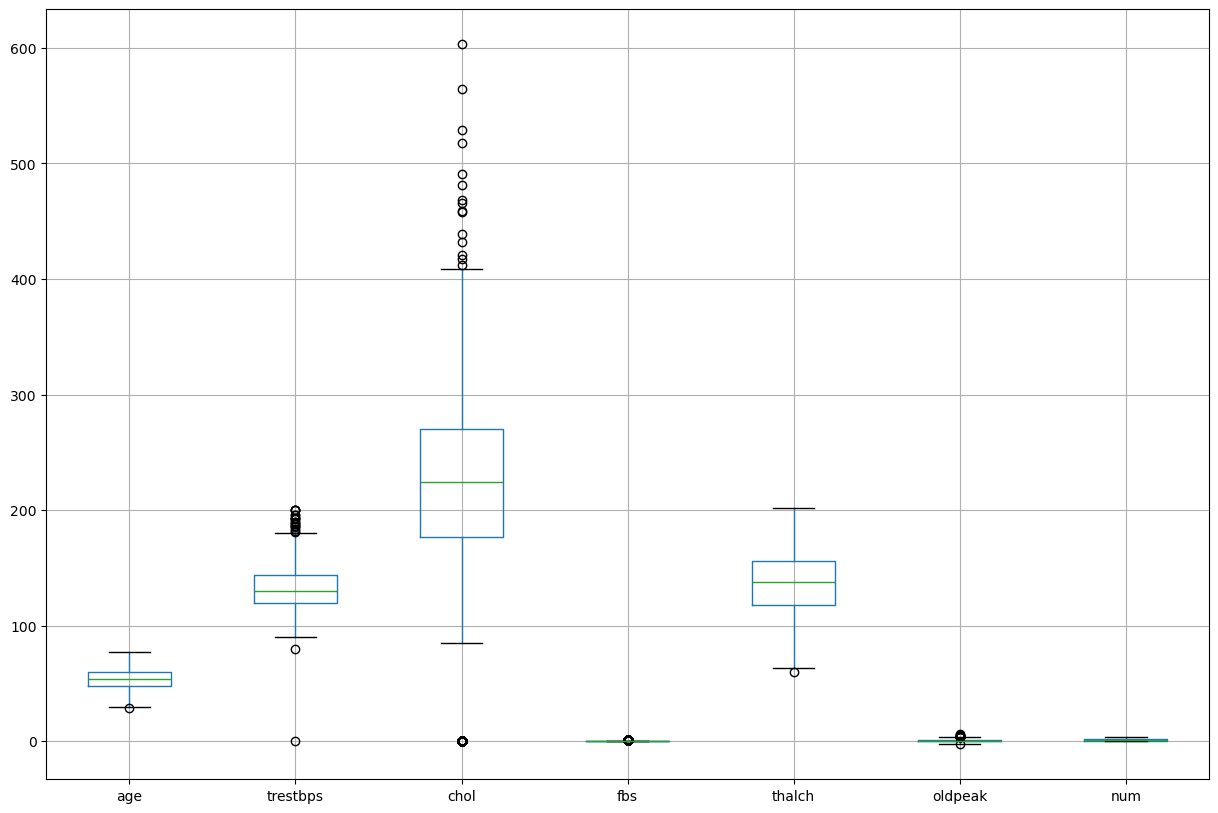

In [99]:
df.boxplot(figsize=(15,10))

### Feature Engineering

In [100]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [101]:
df["fbs"]= df["fbs"].astype(int)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,1,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,0,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,0,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,0,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,0,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,0,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,0,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,0,lv hypertrophy,123,TRUE,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,1,st-t abnormality,105,TURE,0.5,downsloping,normal,4


In [102]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs           int32
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [103]:
for cols in df.columns:
    if df[cols].dtype=='object':
        df[cols]= df[cols].astype(str)
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs           int32
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [111]:
cat_cols=df.select_dtypes(include='object').columns
label=LabelEncoder()
for cols in cat_cols:
    df[cols]=label.fit_transform(df[cols])


In [112]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,0,1.5,2,2,4
904,62,1,0,166,170,0,2,120,1,3.0,1,0,4
905,56,1,2,170,0,0,0,123,1,2.5,0,2,4
906,56,1,2,144,208,1,2,105,2,0.5,0,1,4


In [113]:
df.rename(columns={'num':'target'},inplace=True)

In [114]:
corr=df.corr()

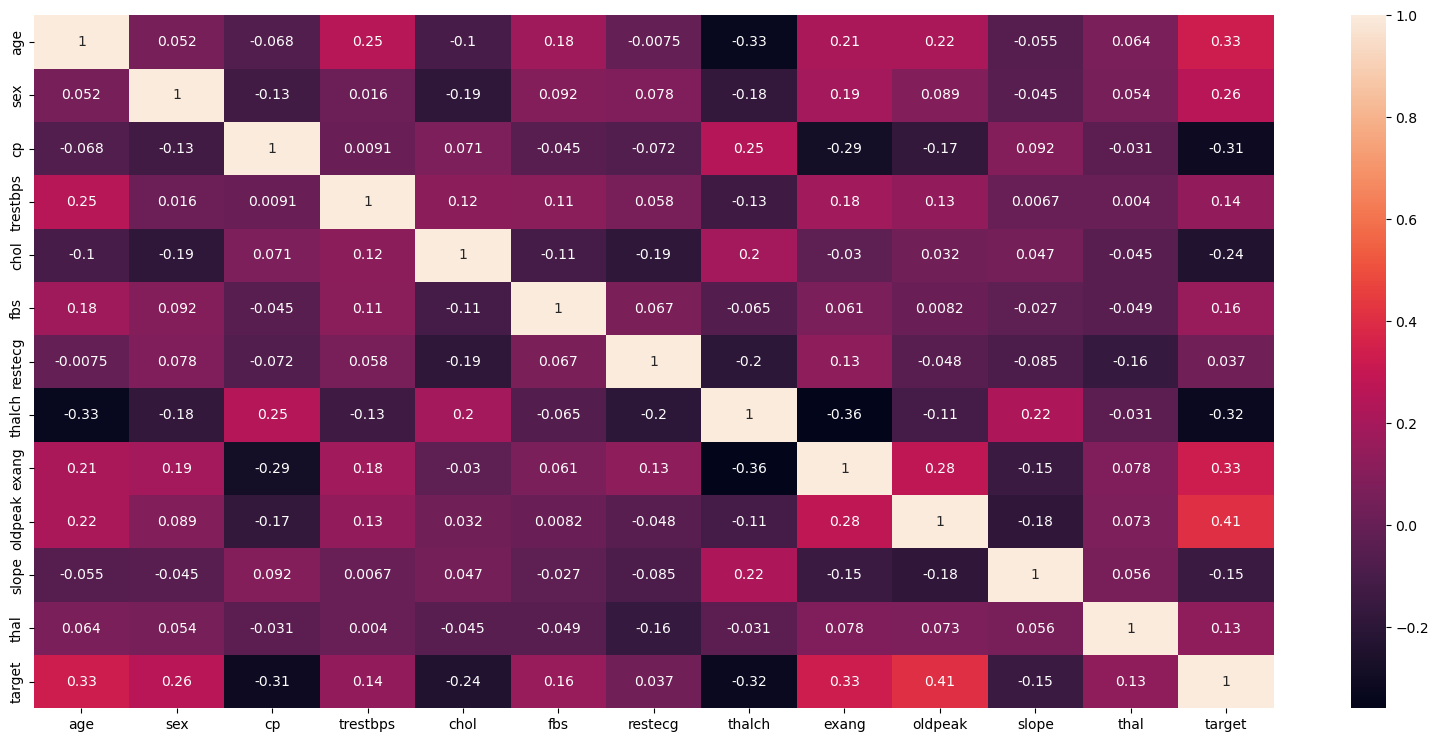

In [117]:
plt.figure(figsize=(20,9))
sns.heatmap(corr,annot=True)
plt.show()

### Decision Tree

In [119]:
x=df.drop('target',axis=1)
y=df['target']

In [120]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=27)

In [122]:
ds_model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
ds_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [125]:
y_predict=ds_model.predict(x_test)
classification_report(y_test,y_predict)

'              precision    recall  f1-score   support\n\n           0       0.69      0.88      0.77       122\n           1       0.52      0.55      0.53        88\n           2       0.14      0.10      0.12        30\n           3       0.00      0.00      0.00        22\n           4       0.00      0.00      0.00        11\n\n    accuracy                           0.58       273\n   macro avg       0.27      0.30      0.28       273\nweighted avg       0.49      0.58      0.53       273\n'

In [130]:
parameters={'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7,8,9,10],'splitter':['random','best']}

In [131]:
grid_search= GridSearchCV(ds_model,parameters)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['random', 'best']})

In [132]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 2, 'splitter': 'random'}

In [136]:
ds_model_0=DecisionTreeClassifier(criterion='log_loss',max_depth=5,splitter='best')
ds_model_0.fit(x_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=5)

In [137]:
y_predict_0=ds_model_0.predict(x_test)
classification_report(y_test,y_predict_0)

'              precision    recall  f1-score   support\n\n           0       0.75      0.80      0.77       122\n           1       0.55      0.67      0.61        88\n           2       0.23      0.10      0.14        30\n           3       0.23      0.23      0.23        22\n           4       0.00      0.00      0.00        11\n\n    accuracy                           0.60       273\n   macro avg       0.35      0.36      0.35       273\nweighted avg       0.55      0.60      0.57       273\n'

### Model Evaluation and Analysis

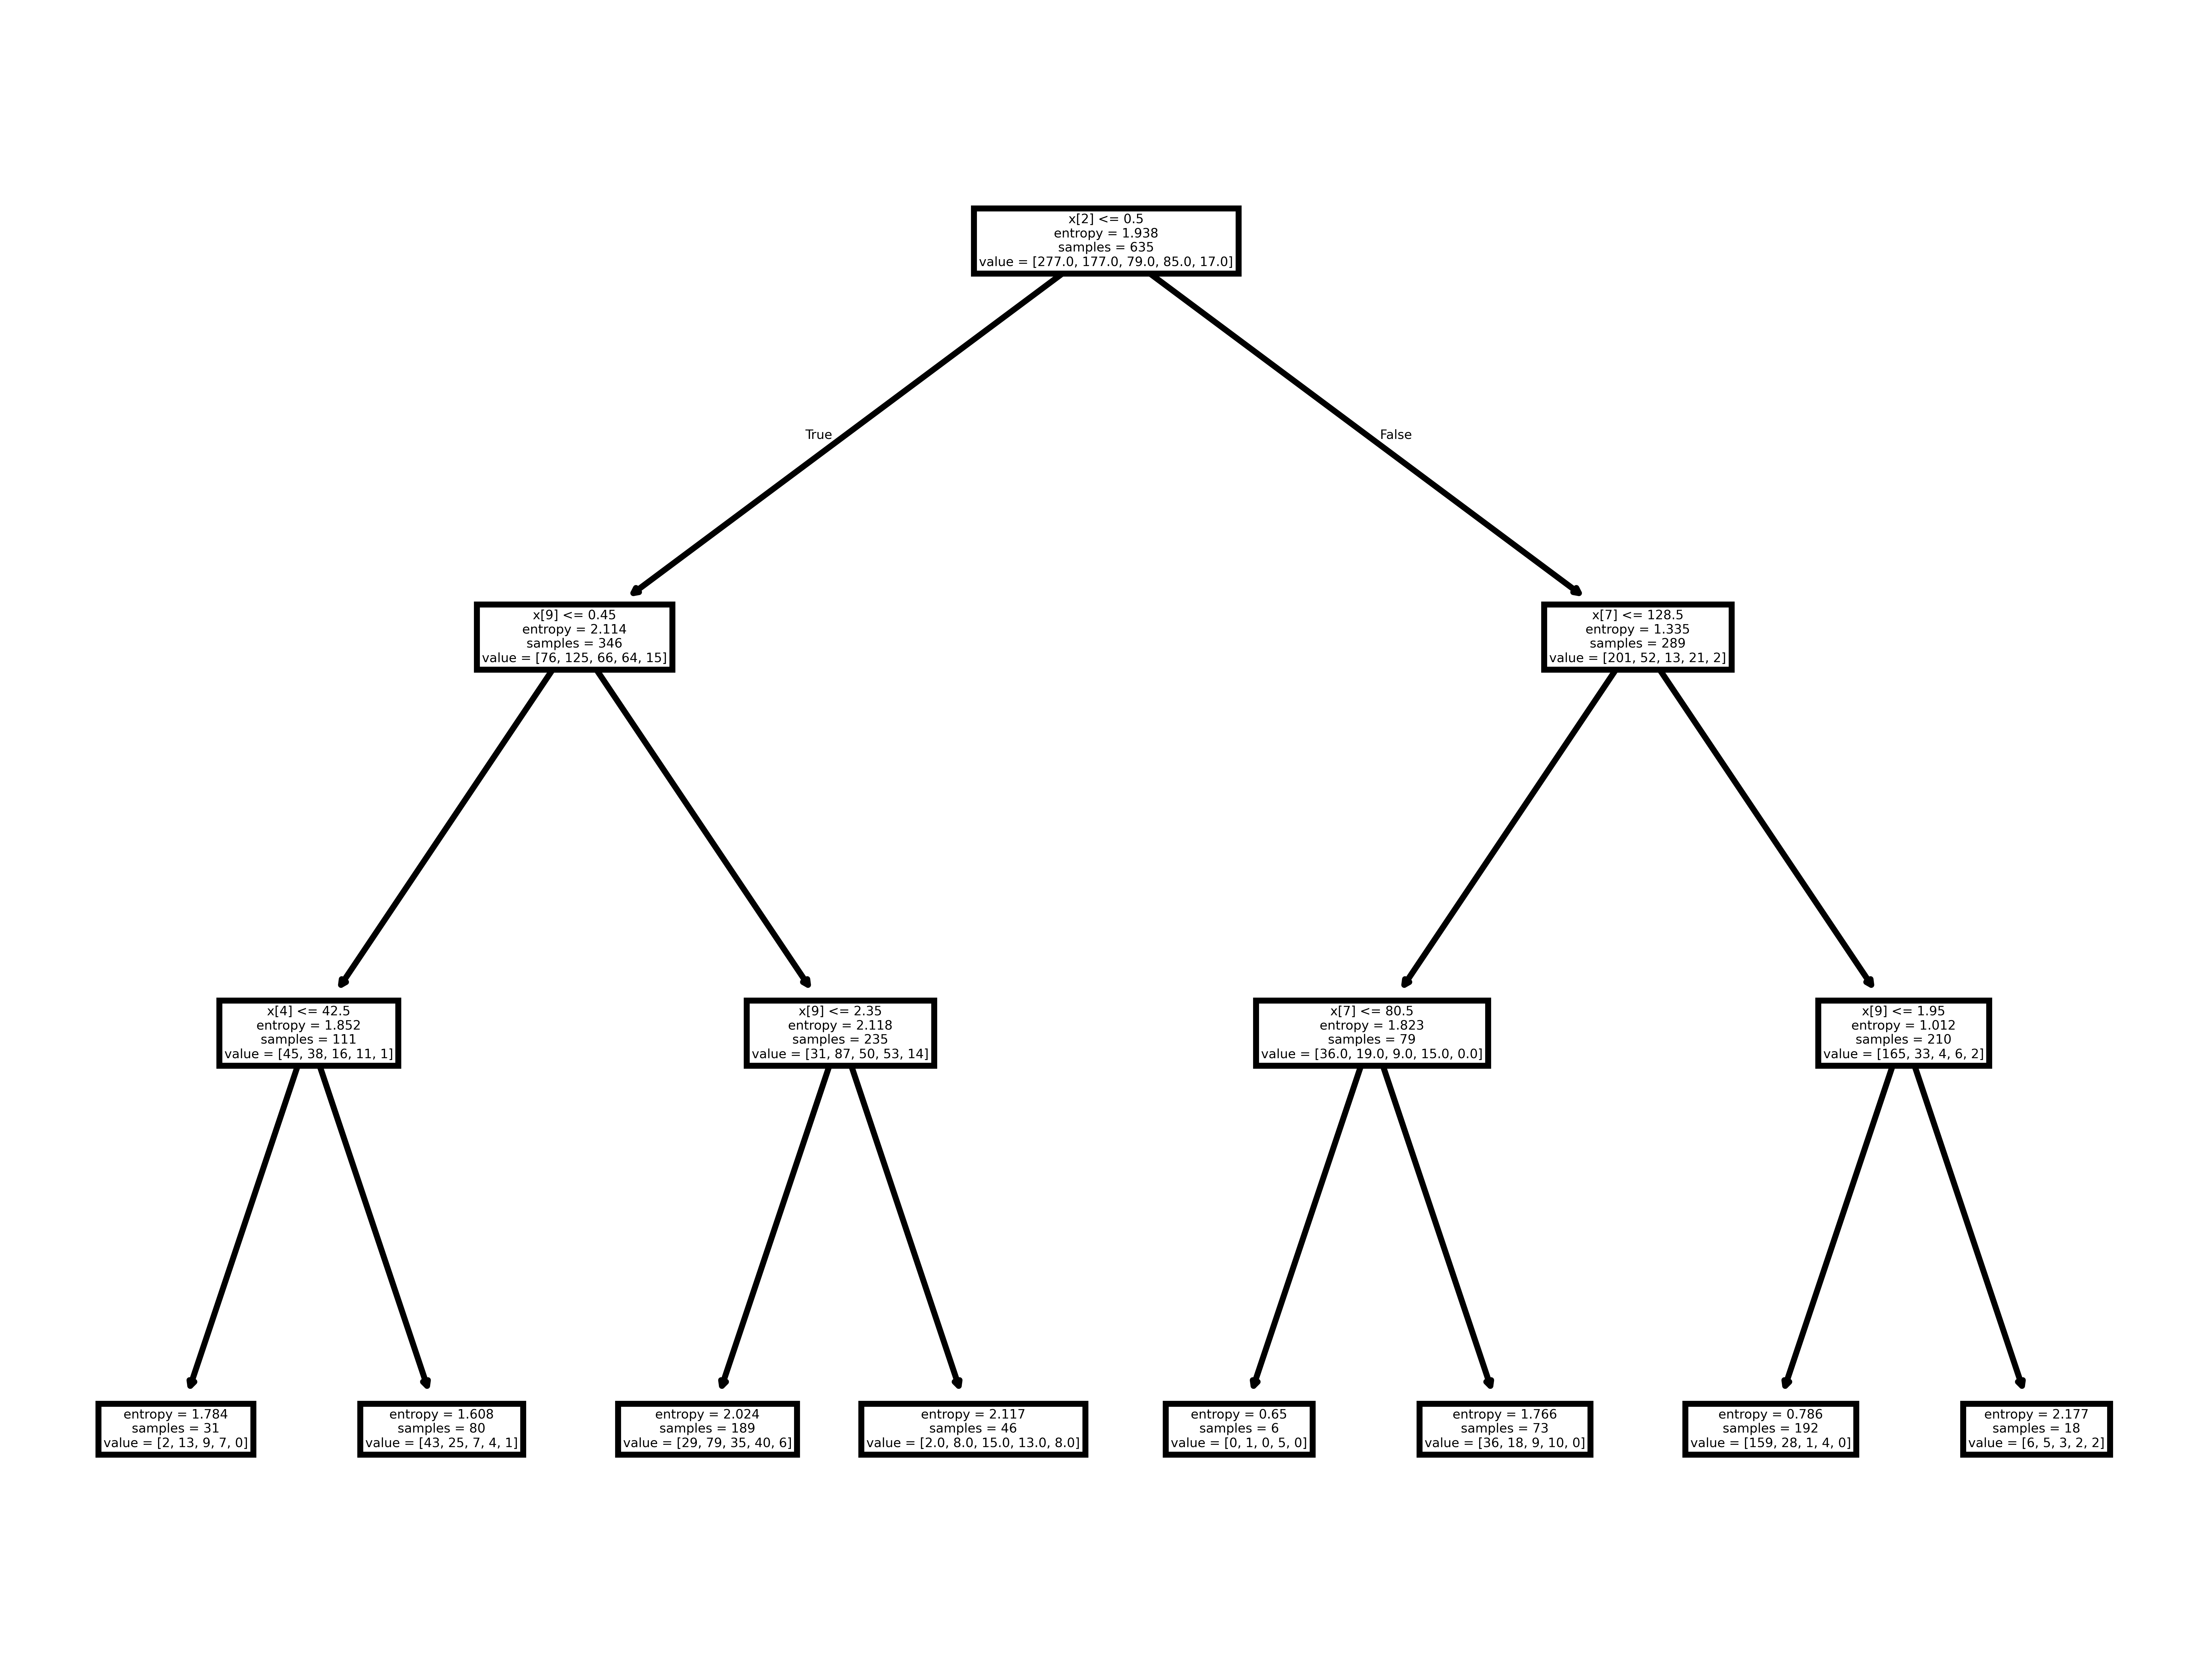

In [142]:
plt.figure(dpi=1500)
tree.plot_tree(ds_model)
plt.show()

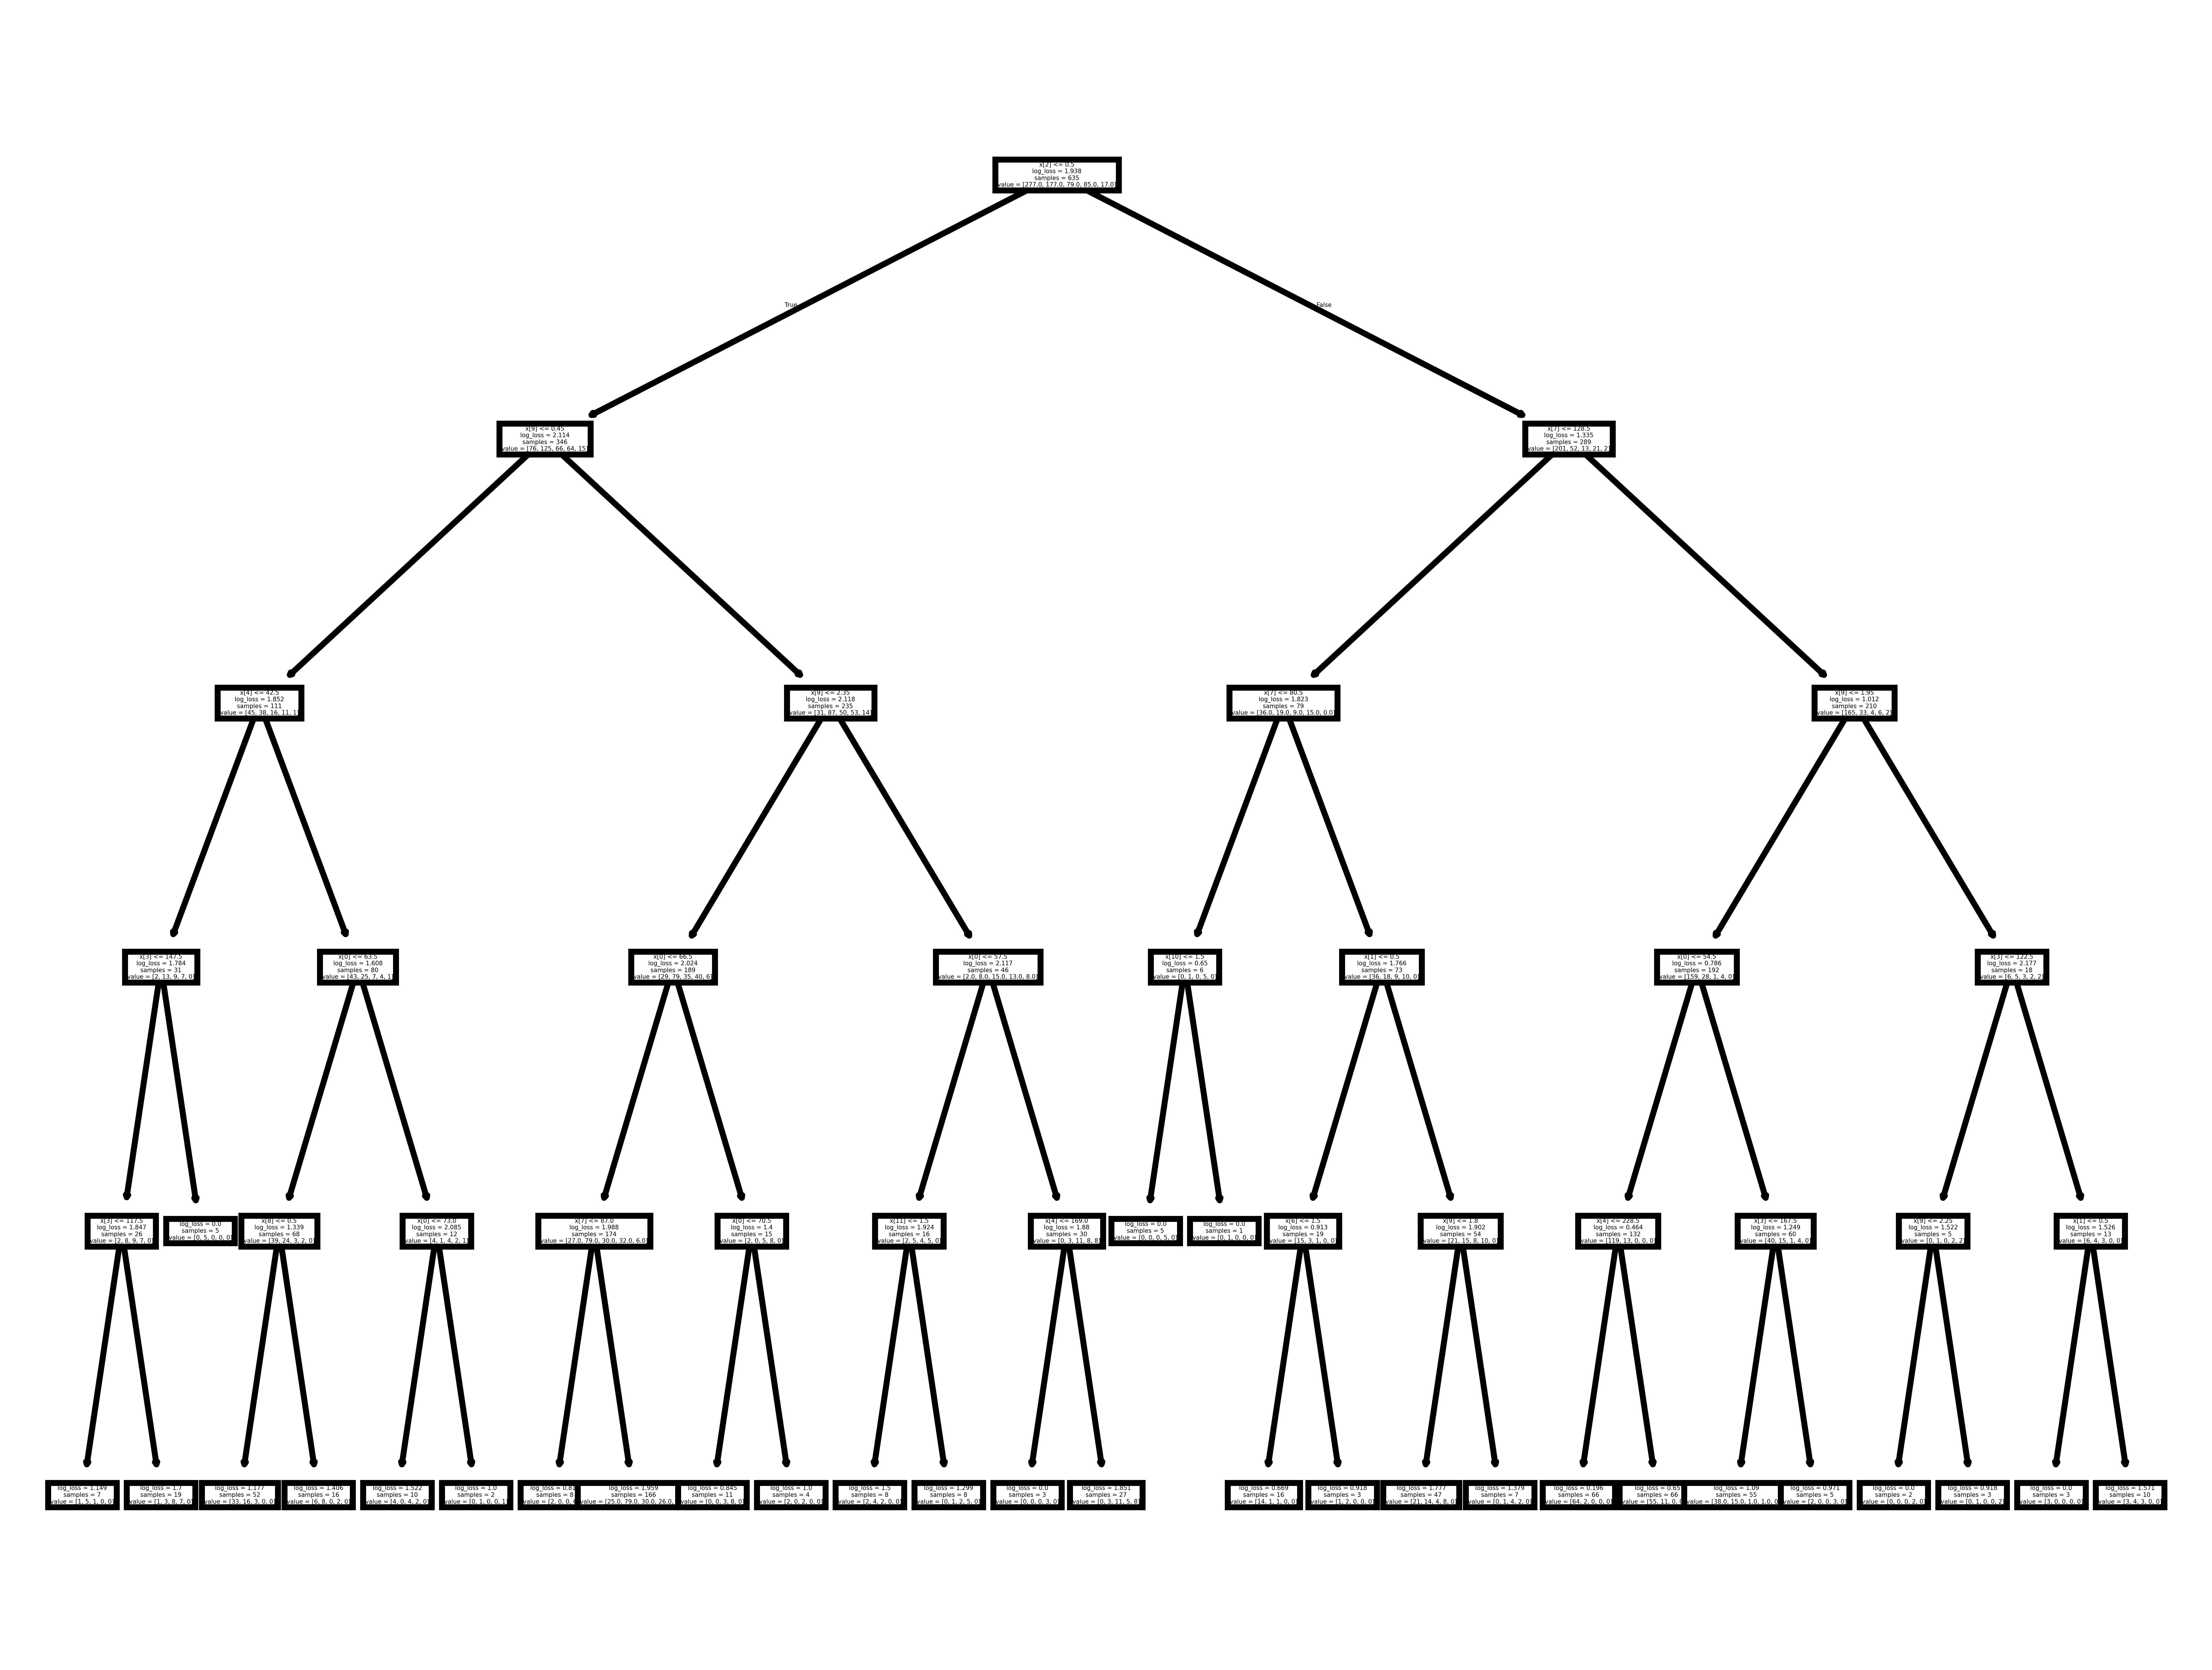

In [143]:
plt.figure(dpi=1500)
tree.plot_tree(ds_model_0)
plt.show()

1. #### Common Decision Tree Hyperparameters

max_depth: Controls the maximum depth of the tree. Deeper trees can overfit by capturing noise in the data. Limiting depth helps prevent this.

min_samples_split: Specifies the minimum number of samples required to split an internal node. Higher values can prevent the tree from making splits on small, noisy subsets of the data, reducing overfitting.

min_samples_leaf: Determines the minimum number of samples required to be at a leaf node. Larger values enforce smoother decision boundaries, reducing overfitting.

criterion: Defines the function to measure the quality of a split. Common options include "gini" (Gini impurity) and "entropy" (information gain). These metrics guide the tree in finding splits that maximize node purity.

max_features: Controls the number of features considered when looking for the best split at each node. Limiting this number can improve training speed and potentially reduce overfitting by preventing the tree from focusing on a few highly correlated features.

2. #### Label Encoding vs. One-Hot Encoding
Label Encoding: Assigns a unique integer to each category. Suitable for ordinal categorical variables where the order between categories is meaningful (e.g., low, medium, high).

One-Hot Encoding: Creates a new binary feature for each category. This is appropriate for nominal categorical variables where there is no inherent order between categories (e.g., colors, countries). One-hot encoding avoids introducing an artificial order that might not exist in the data.